# Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"D:\Data Set\archive (21)\salary_prediction_data.csv")

In [3]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [4]:
data.shape

(1000, 7)

In [5]:
data.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [6]:
data.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [7]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,1,84620.053665
1,PhD,11,Suburban,Director,59,1,142591.255894
2,Bachelor,28,Suburban,Manager,61,0,97800.255404
3,High School,29,Rural,Director,45,1,96834.671282
4,PhD,25,Urban,Analyst,26,0,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,0,64683.389864
996,High School,24,Urban,Engineer,30,0,74468.205020
997,Master,18,Rural,Analyst,44,1,98207.026024
998,Bachelor,27,Suburban,Director,31,0,108544.922720


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\melbi\AppData\Local\Temp\ipykernel_6184\971148556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary']);


<function matplotlib.pyplot.show(close=None, block=None)>

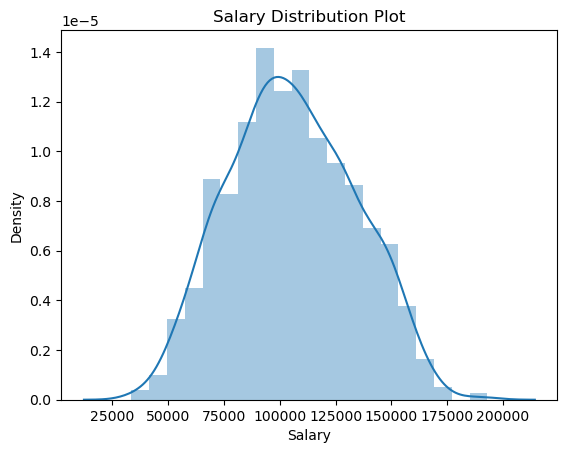

In [9]:
plt.title('Salary Distribution Plot')
sns.distplot(data['Salary']);
plt.show

<Axes: xlabel='Experience', ylabel='Salary'>

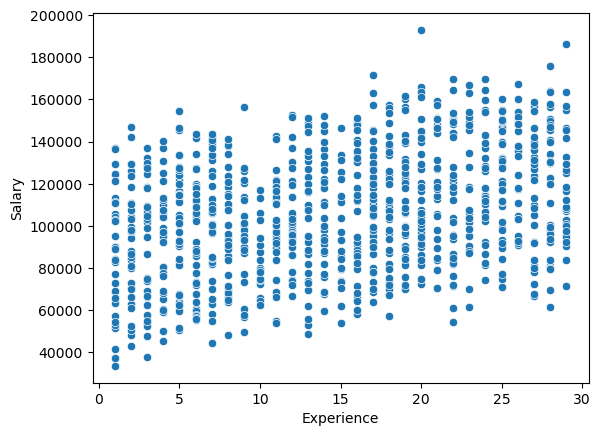

In [10]:
sns.scatterplot(x='Experience',y='Salary',data=data)

In [11]:
data.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [12]:
X=data[['Experience']] #Indipendent
Y=data['Salary'] #Dependent

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
#Spliting dataset into train/test
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

In [15]:
#Regression Modeling

regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
#predition result
y_pred=regression.predict(X_test)

Mean Squared Error: 738344126.9254837
R^2 Score: 0.10339544064227535


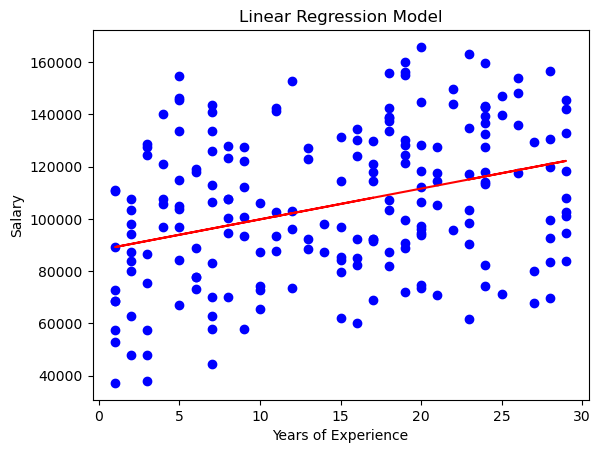

In [18]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Visualize the model
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.show()

# Simple Classification

### Logistic regression

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
data=pd.read_csv(r"D:\Data Set\titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
median_age=data['Age'].median()
median_age

28.0

In [23]:
data['Age'].fillna(median_age,inplace=True)

In [24]:
data.drop(columns=['Cabin'],inplace=True)

In [25]:
list(data['Sex'].unique())

['male', 'female']

In [26]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoding=OneHotEncoder(sparse=False)

transformed_data=one_hot_encoding.fit_transform(data[['Sex','Embarked']])
feature_name=one_hot_encoding.get_feature_names_out(['Sex','Embarked'])
encoder_col=pd.DataFrame(transformed_data, columns=feature_name)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
data=pd.concat([data,encoder_col],axis=1)
data.drop(columns=['Sex','Embarked'],inplace=True)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
data.drop(columns=['Name','Ticket'],inplace=True)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan'],
      dtype='object')

In [30]:
data.fillna(0,inplace=True)

In [31]:
x=data.drop(columns=['Survived'])
y=data['Survived']

In [32]:
x.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0
4,5,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

clf=LogisticRegression()
clf.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred=clf.predict(x_test)

In [37]:
cm=classification_report(y_test,y_pred)
print("Classification Report:",cm)

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



# Clustering Algorithm 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv(r"D:\Data Set\archive (22)\Mall_Customers.csv")

In [40]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
X=data.iloc[:,[3,4]].values
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [43]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [44]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=42)
kmeans.fit(X_scaler)
data['Cluster']=kmeans.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^

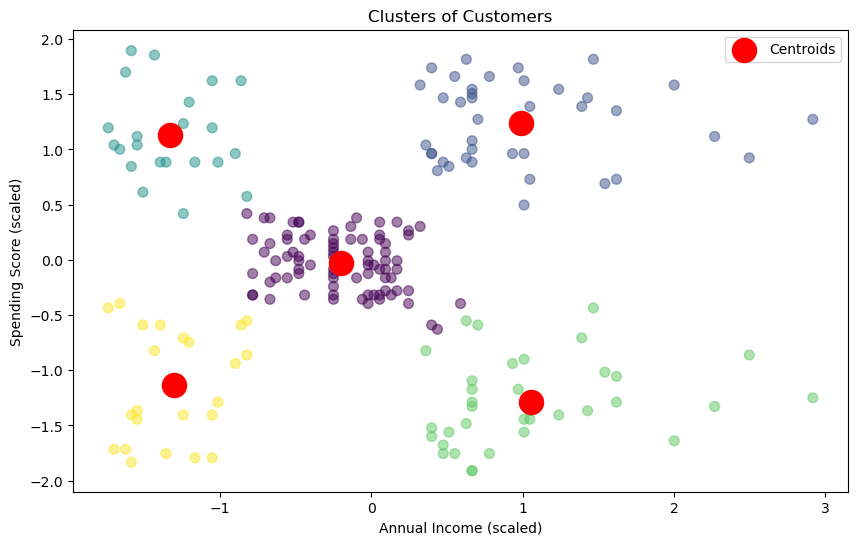

In [45]:
# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaler[:,0], X_scaler[:,1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()